In [12]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# Licence: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

Automatically created module for IPython interactive environment


In [13]:
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))

In [14]:
print X_true

[[ 10.   3.]
 [  8.   0.]
 [ 19.  10.]
 [ 11.   9.]
 [ 10.   6.]
 [  0.  12.]
 [  7.  14.]
 [ 17.   2.]
 [  2.   1.]
 [ 19.   5.]
 [  8.  14.]
 [  1.  10.]
 [  7.  11.]
 [  1.  15.]
 [ 16.   5.]
 [ 17.  14.]
 [  0.   0.]
 [  9.  18.]
 [  5.   7.]
 [  5.  14.]]


In [15]:
# Center the data
X_true -= X_true.mean()
print X_true

[[  1.45  -5.55]
 [ -0.55  -8.55]
 [ 10.45   1.45]
 [  2.45   0.45]
 [  1.45  -2.55]
 [ -8.55   3.45]
 [ -1.55   5.45]
 [  8.45  -6.55]
 [ -6.55  -7.55]
 [ 10.45  -3.55]
 [ -0.55   5.45]
 [ -7.55   1.45]
 [ -1.55   2.45]
 [ -7.55   6.45]
 [  7.45  -3.55]
 [  8.45   5.45]
 [ -8.55  -8.55]
 [  0.45   9.45]
 [ -3.55  -1.55]
 [ -3.55   5.45]]


In [16]:
similarities = euclidean_distances(X_true)
print similarities

[[  0.           3.60555128  11.40175425   6.08276253   3.          13.45362405
   11.40175425   7.07106781   8.24621125   9.21954446  11.18033989
   11.40175425   8.54400375  15.           6.32455532  13.03840481
   10.44030651  15.03329638   6.40312424  12.08304597]
 [  3.60555128   0.          14.86606875   9.48683298   6.32455532
   14.4222051   14.03566885   9.21954446   6.08276253  12.08304597  14.
   12.20655562  11.04536102  16.55294536   9.43398113  16.64331698   8.
   18.02775638   7.61577311  14.31782106]
 [ 11.40175425  14.86606875   0.           8.06225775   9.8488578
   19.10497317  12.64911064   8.24621125  19.23538406   5.          11.70469991
   18.          12.04159458  18.68154169   5.83095189   4.47213595
   21.47091055  12.80624847  14.31782106  14.56021978]
 [  6.08276253   9.48683298   8.06225775   0.           3.16227766
   11.40175425   6.40312424   9.21954446  12.04159458   8.94427191
    5.83095189  10.04987562   4.47213595  11.66190379   6.40312424
    7.810

In [17]:
# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

In [18]:
mds = manifold.MDS(n_components=3, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=3, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

In [19]:
# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

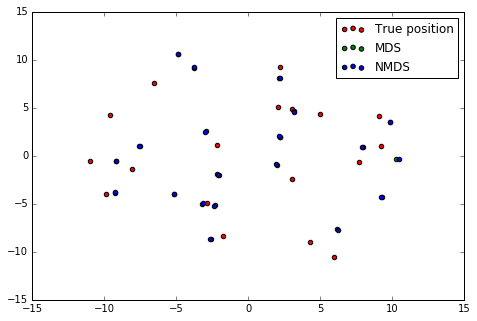

In [20]:
# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

plt.scatter(X_true[:, 0], X_true[:, 1], c='r', s=20)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')
plt.scatter(npos[:, 0], npos[:, 1], s=20, c='b')
plt.legend(('True position', 'MDS', 'NMDS'), loc='best')

In [21]:
similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

/Users/JH/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


In [22]:
# Plot the edges
start_idx, end_idx = np.where(pos)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()